0. Loading the dataset and Pre-processing


In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
#load training and test datasets from Kaggle

#also load csv of preprocessed datasets (to reduce runtime by preprocessing once and storing the preprocessed dataset into csv)

! gdown --id 1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
! gdown --id 1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
! gdown --id 1oiVQignVg1wvE1LXKFvOLHPl0P8GNSDp

! gdown --id 1pGkEyDelD7Lp7yhFML9Dt1oo-91Mqf9H
! gdown --id 1DYVzeYjjTTeHtazHfKD9FTx57h-77bkC

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
To: /content/train.csv
100% 98.6M/98.6M [00:00<00:00, 227MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
To: /content/test.csv
100% 25.1M/25.1M [00:00<00:00, 182MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://dr

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submit_data = pd.read_csv("submit.csv")

In [ ]:
test_data = test_data.join(submit_data["label"])

In [ ]:
# Checking null values
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# Removing null values
train_data.dropna(inplace=True)
train_data.drop(train_data.loc[train_data['text']==" "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="  "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="\n"].index, inplace=True)

# Resetting index
train_data.reset_index(inplace=True)

In [ ]:
train_data= train_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
train_data = train_data.drop(columns=["id", "index"])

In [ ]:
# Checking null values
test_data.isnull().sum()

id          0
title     122
author    503
text        7
label       0
dtype: int64

In [ ]:
# Removing null values
test_data.dropna(inplace=True)
test_data.drop(test_data.loc[test_data['text']==" "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="  "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="\n"].index, inplace=True)

# Resetting index
test_data.reset_index(inplace=True)

In [ ]:
test_data= test_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
test_data = test_data.drop(columns=["id","index"])

In [ ]:
transformed_df = pd.read_csv("pre_train.csv")
transformed_df_test = pd.read_csv("pre_test.csv")

In [ ]:
X_test = transformed_df_test.values
y_test = test_data["label"].values 

In [ ]:
X = transformed_df.values
y = train_data["label"].values

In [ ]:
#calculating train and val error on diff training set sizes (1000, 5000, 10000, 18000)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
X_training_set= []
y_training_set = []
set_size= 4

In [ ]:
for i in [1000, 5000, 10000, 18000]:
  t_set = X[:i]
  y_set = y[:i]
  X_training_set.append(t_set)
  y_training_set.append(y_set)


In [ ]:
#Kfold (k=5) split for training data
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)


In [ ]:
##ML models:

In [ ]:
#Model 1: SVM
from sklearn.svm import SVC

train_error= []
dev_error= []

In [ ]:
for i in range(len(X_training_set)):
  X_train=[]
  X_val=[]
  y_train=[]
  y_val=[]

  X_t = X_training_set[i]
  y_t = y_training_set[i]
  for train_index, test_index in skf.split(X_t,y_t):
    X_train.append(X[train_index])
    X_val.append(X[test_index]) 
    y_train.append(y[train_index])
    y_val.append(y[test_index])

  model_svm_0 = SVC(random_state=0)    
  model_svm_1 = SVC(random_state=0)
  model_svm_2 = SVC(random_state=0)
  model_svm_3 = SVC(random_state=0)
  model_svm_4 = SVC(random_state=0)

  model_svm_0.fit(X_train[0], y_train[0].astype('int'))
  model_svm_1.fit(X_train[1], y_train[1].astype('int'))
  model_svm_2.fit(X_train[2], y_train[2].astype('int'))
  model_svm_3.fit(X_train[3], y_train[3].astype('int'))
  model_svm_4.fit(X_train[4], y_train[4].astype('int'))

  y_pred_0 = model_svm_0.predict(X_val[0])
  y_pred_1 = model_svm_1.predict(X_val[1])
  y_pred_2 = model_svm_2.predict(X_val[2])
  y_pred_3 = model_svm_3.predict(X_val[3])
  y_pred_4 = model_svm_4.predict(X_val[4])

  accuracy_0 = accuracy_score(y_val[0].astype('int'), y_pred_0)
  accuracy_1 = accuracy_score(y_val[1].astype('int'), y_pred_1)
  accuracy_2 = accuracy_score(y_val[2].astype('int'), y_pred_2)
  accuracy_3 = accuracy_score(y_val[3].astype('int'), y_pred_3)
  accuracy_4 = accuracy_score(y_val[4].astype('int'), y_pred_4)

  mean_acc = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

  dev_error.append(mean_acc)

  y_pred_0 = model_svm_0.predict(X_train[0])
  y_pred_1 = model_svm_1.predict(X_train[1])
  y_pred_2 = model_svm_2.predict(X_train[2])
  y_pred_3 = model_svm_3.predict(X_train[3])
  y_pred_4 = model_svm_4.predict(X_train[4])

  accuracy_0 = accuracy_score(y_train[0].astype('int'), y_pred_0)
  accuracy_1 = accuracy_score(y_train[1].astype('int'), y_pred_1)
  accuracy_2 = accuracy_score(y_train[2].astype('int'), y_pred_2)
  accuracy_3 = accuracy_score(y_train[3].astype('int'), y_pred_3)
  accuracy_4 = accuracy_score(y_train[4].astype('int'), y_pred_4)

  mean_acc = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

  train_error.append(mean_acc)


In [ ]:
#comparing train vs dev error

In [ ]:
dev_error

[0.897, 0.9376000000000001, 0.9478, 0.9570555555555555]

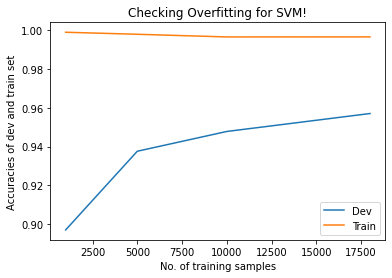

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1000, 5000, 10000, 18000], dev_error, label="Dev")
plt.plot([1000, 5000, 10000, 18000], train_error, label="Train")
# naming the x axis
plt.xlabel('No. of training samples')
# naming the y axis
plt.ylabel('Accuracies of dev and train set')
 
# giving a title to my graph
plt.title('Checking Overfitting for SVM!')
plt.legend()
# function to show the plot
plt.show()

In [ ]:
#model 2: Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt_0 = DecisionTreeClassifier(random_state=0)
model_dt_1 = DecisionTreeClassifier(random_state=0)
model_dt_2 = DecisionTreeClassifier(random_state=0)
model_dt_3 = DecisionTreeClassifier(random_state=0)
model_dt_4 = DecisionTreeClassifier(random_state=0)

In [ ]:
model_dt_0.fit(X_train[0], y_train[0].astype('int'))
model_dt_1.fit(X_train[1], y_train[1].astype('int'))
model_dt_2.fit(X_train[2], y_train[2].astype('int'))
model_dt_3.fit(X_train[3], y_train[3].astype('int'))
model_dt_4.fit(X_train[4], y_train[4].astype('int'))

NameError: ignored

In [ ]:
y_pred_0 = model_dt_0.predict(X_val[0])
y_pred_1 = model_dt_1.predict(X_val[1])
y_pred_2 = model_dt_2.predict(X_val[2])
y_pred_3 = model_dt_3.predict(X_val[3])
y_pred_4 = model_dt_4.predict(X_val[4])


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Comparing the 5 DT models on resp. val set')
#model 1
print('\nEvaluation Metrics for Model 1:')
print("Accuracy: ", accuracy_score(y_val[0].astype('int'), y_pred_0))
print("Precision: ", precision_score(y_val[0].astype('int'), y_pred_0))
print("Recall: ", recall_score(y_val[0].astype('int'), y_pred_0))
print("f1-score: ", f1_score(y_val[0].astype('int'), y_pred_0))

#model 2
print('\nEvaluation Metrics for Model 2:')
print("Accuracy: ", accuracy_score(y_val[1].astype('int'), y_pred_1))
print("Precision: ", precision_score(y_val[1].astype('int'), y_pred_1))
print("Recall: ", recall_score(y_val[1].astype('int'), y_pred_1))
print("f1-score: ", f1_score(y_val[1].astype('int'), y_pred_1))

#model 3
print('\nEvaluation Metrics for Model 3:')
print("Accuracy: ", accuracy_score(y_val[2].astype('int'), y_pred_2))
print("Precision: ", precision_score(y_val[2].astype('int'), y_pred_2))
print("Recall: ", recall_score(y_val[2].astype('int'), y_pred_2))
print("f1-score: ", f1_score(y_val[2].astype('int'), y_pred_2))

#model 4
print('\nEvaluation Metrics for Model 4:')
print("Accuracy: ", accuracy_score(y_val[3].astype('int'), y_pred_3))
print("Precision: ", precision_score(y_val[3].astype('int'), y_pred_3))
print("Recall: ", recall_score(y_val[3].astype('int'), y_pred_3))
print("f1-score: ", f1_score(y_val[3].astype('int'), y_pred_3))

#model 5
print('\nEvaluation Metrics for Model 5:')
print("Accuracy: ", accuracy_score(y_val[4].astype('int'), y_pred_4))
print("Precision: ", precision_score(y_val[4].astype('int'), y_pred_4))
print("Recall: ", recall_score(y_val[4].astype('int'), y_pred_4))
print("f1-score: ", f1_score(y_val[4].astype('int'), y_pred_4))

In [ ]:
#comparing train vs test error

In [ ]:
y_pred_0 = model_dt_0.predict(X)
y_pred_1 = model_dt_1.predict(X)
y_pred_2 = model_dt_2.predict(X)
y_pred_3 = model_dt_3.predict(X)
y_pred_4 = model_dt_4.predict(X)


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Comparing the 5 DT models on train set')
#model 1
print('\nEvaluation Metrics for Model 1:')
print("Accuracy: ", accuracy_score(y.astype('int'), y_pred_0))
print("Precision: ", precision_score(y.astype('int'), y_pred_0))
print("Recall: ", recall_score(y.astype('int'), y_pred_0))
print("f1-score: ", f1_score(y.astype('int'), y_pred_0))

#model 2
print('\nEvaluation Metrics for Model 2:')
print("Accuracy: ", accuracy_score(y.astype('int'), y_pred_1))
print("Precision: ", precision_score(y.astype('int'), y_pred_1))
print("Recall: ", recall_score(y.astype('int'), y_pred_1))
print("f1-score: ", f1_score(y.astype('int'), y_pred_1))

#model 3
print('\nEvaluation Metrics for Model 3:')
print("Accuracy: ", accuracy_score(y.astype('int'), y_pred_2))
print("Precision: ", precision_score(y.astype('int'), y_pred_2))
print("Recall: ", recall_score(y.astype('int'), y_pred_2))
print("f1-score: ", f1_score(y.astype('int'), y_pred_2))

#model 4
print('\nEvaluation Metrics for Model 4:')
print("Accuracy: ", accuracy_score(y.astype('int'), y_pred_3))
print("Precision: ", precision_score(y.astype('int'), y_pred_3))
print("Recall: ", recall_score(y.astype('int'), y_pred_3))
print("f1-score: ", f1_score(y.astype('int'), y_pred_3))

#model 5
print('\nEvaluation Metrics for Model 5:')
print("Accuracy: ", accuracy_score(y.astype('int'), y_pred_4))
print("Precision: ", precision_score(y.astype('int'), y_pred_4))
print("Recall: ", recall_score(y.astype('int'), y_pred_4))
print("f1-score: ", f1_score(y.astype('int'), y_pred_4))

In [ ]:
y_pred_0 = model_dt_0.predict(X_test)
y_pred_1 = model_dt_1.predict(X_test)
y_pred_2 = model_dt_2.predict(X_test)
y_pred_3 = model_dt_3.predict(X_test)
y_pred_4 = model_dt_4.predict(X_test)


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Comparing the 5 DT models on test set')
#model 1
print('\nEvaluation Metrics for Model 1:')
print("Accuracy: ", accuracy_score(y_test.astype('int'), y_pred_0))
print("Precision: ", precision_score(y_test.astype('int'), y_pred_0))
print("Recall: ", recall_score(y_test.astype('int'), y_pred_0))
print("f1-score: ", f1_score(y_test.astype('int'), y_pred_0))

#model 2
print('\nEvaluation Metrics for Model 2:')
print("Accuracy: ", accuracy_score(y_test.astype('int'), y_pred_1))
print("Precision: ", precision_score(y_test.astype('int'), y_pred_1))
print("Recall: ", recall_score(y_test.astype('int'), y_pred_1))
print("f1-score: ", f1_score(y_test.astype('int'), y_pred_1))

#model 3
print('\nEvaluation Metrics for Model 3:')
print("Accuracy: ", accuracy_score(y_test.astype('int'), y_pred_2))
print("Precision: ", precision_score(y_test.astype('int'), y_pred_2))
print("Recall: ", recall_score(y_test.astype('int'), y_pred_2))
print("f1-score: ", f1_score(y_test.astype('int'), y_pred_2))

#model 4
print('\nEvaluation Metrics for Model 4:')
print("Accuracy: ", accuracy_score(y_test.astype('int'), y_pred_3))
print("Precision: ", precision_score(y_test.astype('int'), y_pred_3))
print("Recall: ", recall_score(y_test.astype('int'), y_pred_3))
print("f1-score: ", f1_score(y_test.astype('int'), y_pred_3))

#model 5
print('\nEvaluation Metrics for Model 5:')
print("Accuracy: ", accuracy_score(y_test.astype('int'), y_pred_4))
print("Precision: ", precision_score(y_test.astype('int'), y_pred_4))
print("Recall: ", recall_score(y_test.astype('int'), y_pred_4))
print("f1-score: ", f1_score(y_test.astype('int'), y_pred_4))

In [ ]:
#model 3: MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model_mlp_0 = MLPClassifier(random_state=0)
model_mlp_1 = MLPClassifier(random_state=0)
model_mlp_2 = MLPClassifier(random_state=0)
model_mlp_3 = MLPClassifier(random_state=0)
model_mlp_4 = MLPClassifier(random_state=0)

In [ ]:
model_mlp_0.fit(X_train[0], y_train[0].astype('int'))
model_mlp_1.fit(X_train[1], y_train[1].astype('int'))
model_mlp_2.fit(X_train[2], y_train[2].astype('int'))
model_mlp_3.fit(X_train[3], y_train[3].astype('int'))
model_mlp_4.fit(X_train[4], y_train[4].astype('int'))

In [ ]:
y_pred_0 = model_mlp_0.predict(X_val[0])
y_pred_1 = model_mlp_1.predict(X_val[1])
y_pred_2 = model_mlp_2.predict(X_val[2])
y_pred_3 = model_mlp_3.predict(X_val[3])
y_pred_4 = model_mlp_4.predict(X_val[4])


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Comparing the 5 MLP models on resp. val set')
#model 1
print('\nEvaluation Metrics for Model 1:')
print("Accuracy: ", accuracy_score(y_val[0].astype('int'), y_pred_0))
print("Precision: ", precision_score(y_val[0].astype('int'), y_pred_0))
print("Recall: ", recall_score(y_val[0].astype('int'), y_pred_0))
print("f1-score: ", f1_score(y_val[0].astype('int'), y_pred_0))

#model 2
print('\nEvaluation Metrics for Model 2:')
print("Accuracy: ", accuracy_score(y_val[1].astype('int'), y_pred_1))
print("Precision: ", precision_score(y_val[1].astype('int'), y_pred_1))
print("Recall: ", recall_score(y_val[1].astype('int'), y_pred_1))
print("f1-score: ", f1_score(y_val[1].astype('int'), y_pred_1))

#model 3
print('\nEvaluation Metrics for Model 3:')
print("Accuracy: ", accuracy_score(y_val[2].astype('int'), y_pred_2))
print("Precision: ", precision_score(y_val[2].astype('int'), y_pred_2))
print("Recall: ", recall_score(y_val[2].astype('int'), y_pred_2))
print("f1-score: ", f1_score(y_val[2].astype('int'), y_pred_2))

#model 4
print('\nEvaluation Metrics for Model 4:')
print("Accuracy: ", accuracy_score(y_val[3].astype('int'), y_pred_3))
print("Precision: ", precision_score(y_val[3].astype('int'), y_pred_3))
print("Recall: ", recall_score(y_val[3].astype('int'), y_pred_3))
print("f1-score: ", f1_score(y_val[3].astype('int'), y_pred_3))

#model 5
print('\nEvaluation Metrics for Model 5:')
print("Accuracy: ", accuracy_score(y_val[4].astype('int'), y_pred_4))
print("Precision: ", precision_score(y_val[4].astype('int'), y_pred_4))
print("Recall: ", recall_score(y_val[4].astype('int'), y_pred_4))
print("f1-score: ", f1_score(y_val[4].astype('int'), y_pred_4))

In [ ]:
#comparing train vs test error

In [ ]:
y_pred_0 = model_mlp_0.predict(X)
y_pred_1 = model_mlp_1.predict(X)
y_pred_2 = model_mlp_2.predict(X)
y_pred_3 = model_mlp_3.predict(X)
y_pred_4 = model_mlp_4.predict(X)


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Comparing the 5 MLP models on train set')
#model 1
print('\nEvaluation Metrics for Model 1:')
print("Accuracy: ", accuracy_score(y.astype('int'), y_pred_0))
print("Precision: ", precision_score(y.astype('int'), y_pred_0))
print("Recall: ", recall_score(y.astype('int'), y_pred_0))
print("f1-score: ", f1_score(y.astype('int'), y_pred_0))

#model 2
print('\nEvaluation Metrics for Model 2:')
print("Accuracy: ", accuracy_score(y.astype('int'), y_pred_1))
print("Precision: ", precision_score(y.astype('int'), y_pred_1))
print("Recall: ", recall_score(y.astype('int'), y_pred_1))
print("f1-score: ", f1_score(y.astype('int'), y_pred_1))

#model 3
print('\nEvaluation Metrics for Model 3:')
print("Accuracy: ", accuracy_score(y.astype('int'), y_pred_2))
print("Precision: ", precision_score(y.astype('int'), y_pred_2))
print("Recall: ", recall_score(y.astype('int'), y_pred_2))
print("f1-score: ", f1_score(y.astype('int'), y_pred_2))

#model 4
print('\nEvaluation Metrics for Model 4:')
print("Accuracy: ", accuracy_score(y.astype('int'), y_pred_3))
print("Precision: ", precision_score(y.astype('int'), y_pred_3))
print("Recall: ", recall_score(y.astype('int'), y_pred_3))
print("f1-score: ", f1_score(y.astype('int'), y_pred_3))

#model 5
print('\nEvaluation Metrics for Model 5:')
print("Accuracy: ", accuracy_score(y.astype('int'), y_pred_4))
print("Precision: ", precision_score(y.astype('int'), y_pred_4))
print("Recall: ", recall_score(y.astype('int'), y_pred_4))
print("f1-score: ", f1_score(y.astype('int'), y_pred_4))

In [ ]:
y_pred_0 = model_mlp_0.predict(X_test)
y_pred_1 = model_mlp_1.predict(X_test)
y_pred_2 = model_mlp_2.predict(X_test)
y_pred_3 = model_mlp_3.predict(X_test)
y_pred_4 = model_mlp_4.predict(X_test)


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Comparing the 5 MLP models on test set')
#model 1
print('\nEvaluation Metrics for Model 1:')
print("Accuracy: ", accuracy_score(y_test.astype('int'), y_pred_0))
print("Precision: ", precision_score(y_test.astype('int'), y_pred_0))
print("Recall: ", recall_score(y_test.astype('int'), y_pred_0))
print("f1-score: ", f1_score(y_test.astype('int'), y_pred_0))

#model 2
print('\nEvaluation Metrics for Model 2:')
print("Accuracy: ", accuracy_score(y_test.astype('int'), y_pred_1))
print("Precision: ", precision_score(y_test.astype('int'), y_pred_1))
print("Recall: ", recall_score(y_test.astype('int'), y_pred_1))
print("f1-score: ", f1_score(y_test.astype('int'), y_pred_1))

#model 3
print('\nEvaluation Metrics for Model 3:')
print("Accuracy: ", accuracy_score(y_test.astype('int'), y_pred_2))
print("Precision: ", precision_score(y_test.astype('int'), y_pred_2))
print("Recall: ", recall_score(y_test.astype('int'), y_pred_2))
print("f1-score: ", f1_score(y_test.astype('int'), y_pred_2))

#model 4
print('\nEvaluation Metrics for Model 4:')
print("Accuracy: ", accuracy_score(y_test.astype('int'), y_pred_3))
print("Precision: ", precision_score(y_test.astype('int'), y_pred_3))
print("Recall: ", recall_score(y_test.astype('int'), y_pred_3))
print("f1-score: ", f1_score(y_test.astype('int'), y_pred_3))

#model 5
print('\nEvaluation Metrics for Model 5:')
print("Accuracy: ", accuracy_score(y_test.astype('int'), y_pred_4))
print("Precision: ", precision_score(y_test.astype('int'), y_pred_4))
print("Recall: ", recall_score(y_test.astype('int'), y_pred_4))
print("f1-score: ", f1_score(y_test.astype('int'), y_pred_4))